Glassdoor Dataset Analysis of Data Science Job Postings

Problem Statement
Glassdoor, a leading online job search and career community, has consulted with me, a data analyst, to analyze data science job postings in order to provide useful insights for aspiring data scientists. As a platform that connects job seekers with potential employers, Glassdoor recognizes the importance of understanding trends and patterns in the job market. Through this analysis, I will aim to identify the following key factors that are relevant to job seekers in the data science field:

•	What are the top industries hiring data scientists?
•	What are the average salaries for data scientists across different industries?
•	Which locations offer the most job opportunities for data scientists?
•	What are the required skills and qualifications for a data scientist?
•	What are the most common job titles for data scientists?
•	What are the most in-demand programming languages for data science?
•	What are the top companies hiring data scientists?
•	Is there a correlation between job location and required skills?

I hope this provide aspiring data scientists with the information they need to make informed decisions about their careers and job search strategies. 

 Importing the required libraries for data analysis

In [120]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns 

Loading data into the kernel

In [2]:
data = pd.read_csv("DS_Jobs.csv", encoding = "latin-1")

Making a copy of the data

In [3]:
copy_DS_Jobs = data.copy()

Checking for the shape of the data

In [4]:
data.shape

(672, 15)

Checking the size of the data

In [5]:
data.size

10080

Checking for available columns in the data

In [6]:
data.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

Checking for null values in the data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              672 non-null    int64 
 1   Job Title          672 non-null    object
 2   Salary Estimate    672 non-null    object
 3   Job Description    672 non-null    object
 4   Rating             672 non-null    object
 5   Company Name       672 non-null    object
 6   Location           672 non-null    object
 7   Headquarters       672 non-null    object
 8   Size               672 non-null    object
 9   Founded            672 non-null    object
 10  Type of ownership  672 non-null    object
 11  Industry           672 non-null    object
 12  Sector             672 non-null    object
 13  Revenue            672 non-null    object
 14  Competitors        672 non-null    object
dtypes: int64(1), object(14)
memory usage: 78.9+ KB


In [8]:
data.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

Correlation matrix of numerical columns in the dataset

In [9]:
data.corr()

,index
index,1.0


A correlation coefficient of 1.0 means that there is a perfect positive correlation between the numeric columns. 

Checking for available columns in the data

In [10]:
data.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

Count of unique salary estimates in the 'Salary Estimate' column

In [11]:
data['Salary Estimate'].value_counts()

$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     30
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$110K-$163K (Glassdoor est.)    21
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$95K-$119K (Glassdoor est.)     21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$122K-$146K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$79K-$147K (Glassdoor est.)     20
$31K-$56K (Glassdoor est.)      20
$145K-$225K(Employer est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$79K-$133K (Glassdoo

Checking for  Data type of 'Salary Estimate' column 

In [12]:
data['Salary Estimate'].dtype 

dtype('O')

In [13]:
data[data['Salary Estimate']!='-1']

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,$1 to $2 billion (USD),"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),$100 to $500 million (USD)
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),$100 to $500 million (USD)
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWeâre looking for a data scientis...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),$100 to $500 million (USD)
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,$100 to $500 million (USD),JKGT,"San Francisco, CA",$100 to $500 million (USD),1 to 50 employees,$100 to $500 million (USD),Government,IT Services,Health Care,$100 to $500 million (USD),$100 to $500 million (USD)
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,$100 to $500 million (USD),AccessHope,"Irwindale, CA",$100 to $500 million (USD),1 to 50 employees,$100 to $500 million (USD),Government,IT Services,Health Care,$100 to $500 million (USD),$100 to $500 million (USD)
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,$100 to $500 million (USD),Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),$100 to $500 million (USD)


Removing any rows that do not have a valid salary estimate

In [14]:
data['Salary Estimate']!='-1'

0      True
1      True
2      True
3      True
4      True
       ... 
667    True
668    True
669    True
670    True
671    True
Name: Salary Estimate, Length: 672, dtype: bool

Checking for duplicates in the data

In [15]:
data[data.duplicated()]

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors


Suming duplicates in the data

In [16]:
data.duplicated().sum()

0

Checking for first 5 rows of the data

In [17]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,$1 to $2 billion (USD),"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),$100 to $500 million (USD)
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),$100 to $500 million (USD)
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),"Commerce Signals, Cardlytics, Yodlee"


Checking for the last five rows of the data

In [18]:
data.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWeâre looking for a data scientis...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),$100 to $500 million (USD)
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,$100 to $500 million (USD),JKGT,"San Francisco, CA",$100 to $500 million (USD),1 to 50 employees,$100 to $500 million (USD),Government,IT Services,Health Care,$100 to $500 million (USD),$100 to $500 million (USD)
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,$100 to $500 million (USD),AccessHope,"Irwindale, CA",$100 to $500 million (USD),1 to 50 employees,$100 to $500 million (USD),Government,IT Services,Health Care,$100 to $500 million (USD),$100 to $500 million (USD)
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,$100 to $500 million (USD),Company - Private,Advertising & Marketing,Business Services,$1 to $5 million (USD),$100 to $500 million (USD)
671,671,Data Scientist,$105K-$167K (Glassdoor est.),Description\n\nThe Data Scientist will be part...,2.7,1-800-Flowers\n2.7,"New York, NY","Carle Place, NY",1001 to 5000 employees,1976,Company - Public,Wholesale,Business Services,$1 to $2 billion (USD),$100 to $500 million (USD)


Checking for null values in the data

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              672 non-null    int64 
 1   Job Title          672 non-null    object
 2   Salary Estimate    672 non-null    object
 3   Job Description    672 non-null    object
 4   Rating             672 non-null    object
 5   Company Name       672 non-null    object
 6   Location           672 non-null    object
 7   Headquarters       672 non-null    object
 8   Size               672 non-null    object
 9   Founded            672 non-null    object
 10  Type of ownership  672 non-null    object
 11  Industry           672 non-null    object
 12  Sector             672 non-null    object
 13  Revenue            672 non-null    object
 14  Competitors        672 non-null    object
dtypes: int64(1), object(14)
memory usage: 78.9+ KB


Checking for missing values in the corresponding column.

In [20]:
data.isnull().sum()

index                0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

Checking for the  column labels

In [21]:
data.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

Checking the data type of the values in the column labeled 'Salary Estimate'.

In [22]:
data['Salary Estimate'].dtype

dtype('O')

Checking the frequency of each unique value in the  column labeled 'Salary Estimate'.

In [23]:
data['Salary Estimate'].value_counts()

$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     30
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$110K-$163K (Glassdoor est.)    21
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$95K-$119K (Glassdoor est.)     21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$122K-$146K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$79K-$147K (Glassdoor est.)     20
$31K-$56K (Glassdoor est.)      20
$145K-$225K(Employer est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$79K-$133K (Glassdoo

Removing all the rows from the original Data where the 'Salary Estimate' was not provided

In [24]:
data = data[data['Salary Estimate']!= '-1']

Counting the frequency of each unique value in the 'Salary Estimate' column 

In [25]:
data['Salary Estimate'].value_counts()

$79K-$131K (Glassdoor est.)     32
$99K-$132K (Glassdoor est.)     32
$75K-$131K (Glassdoor est.)     32
$137K-$171K (Glassdoor est.)    30
$90K-$109K (Glassdoor est.)     30
$56K-$97K (Glassdoor est.)      22
$79K-$106K (Glassdoor est.)     22
$90K-$124K (Glassdoor est.)     22
$110K-$163K (Glassdoor est.)    21
$92K-$155K (Glassdoor est.)     21
$138K-$158K (Glassdoor est.)    21
$128K-$201K (Glassdoor est.)    21
$212K-$331K (Glassdoor est.)    21
$95K-$119K (Glassdoor est.)     21
$69K-$116K (Glassdoor est.)     21
$124K-$198K (Glassdoor est.)    21
$112K-$116K (Glassdoor est.)    21
$122K-$146K (Glassdoor est.)    21
$91K-$150K (Glassdoor est.)     21
$101K-$165K (Glassdoor est.)    21
$79K-$147K (Glassdoor est.)     20
$31K-$56K (Glassdoor est.)      20
$145K-$225K(Employer est.)      20
$141K-$225K (Glassdoor est.)    20
$66K-$112K (Glassdoor est.)     20
$80K-$132K (Glassdoor est.)     20
$87K-$141K (Glassdoor est.)     20
$105K-$167K (Glassdoor est.)    20
$79K-$133K (Glassdoo

Removing all text that comes after the values in the 'Salary Estimate'

In [26]:
salary = data['Salary Estimate'].apply(lambda e : e.split('(')[0])

In [27]:
salary

0      $137K-$171K 
1      $137K-$171K 
2      $137K-$171K 
3      $137K-$171K 
4      $137K-$171K 
           ...     
667    $105K-$167K 
668    $105K-$167K 
669    $105K-$167K 
670    $105K-$167K 
671    $105K-$167K 
Name: Salary Estimate, Length: 672, dtype: object

Removing the dollar sign ('$')and the letter 'K'

In [28]:
salary = salary.apply(lambda x : x.replace('$' ,'').replace('K',''))

In [29]:
salary.unique()

array(['137-171 ', '75-131 ', '79-131 ', '99-132 ', '90-109 ', '101-165 ',
       '56-97 ', '79-106 ', '71-123 ', '90-124 ', '91-150 ', '141-225 ',
       '145-225', '79-147 ', '122-146 ', '112-116 ', '110-163 ',
       '124-198 ', '79-133 ', '69-116 ', '31-56 ', '95-119 ', '212-331 ',
       '66-112 ', '128-201 ', '138-158 ', '80-132 ', '87-141 ', '92-155 ',
       '105-167 '], dtype=object)

Converting characters to lowercase and removing all irrelevant text that are not related to salary information

In [30]:
salary = salary.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))

In [31]:
salary.unique()

array(['137-171 ', '75-131 ', '79-131 ', '99-132 ', '90-109 ', '101-165 ',
       '56-97 ', '79-106 ', '71-123 ', '90-124 ', '91-150 ', '141-225 ',
       '145-225', '79-147 ', '122-146 ', '112-116 ', '110-163 ',
       '124-198 ', '79-133 ', '69-116 ', '31-56 ', '95-119 ', '212-331 ',
       '66-112 ', '128-201 ', '138-158 ', '80-132 ', '87-141 ', '92-155 ',
       '105-167 '], dtype=object)

Extracting the minimum salary value and storing it in a new column called 'min_salary'

In [32]:
data['min_salary'] = salary.apply(lambda t : t.split('-')[0])

Extracting the maximum salary value and storing it in a new column called 'max_salary'

In [33]:
data['max_salary'] = salary.apply(lambda t : t.split('-')[1])

Checking for the last five rows of the data

In [34]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,$1 to $2 billion (USD),"EmblemHealth, UnitedHealth Group, Aetna",137,171
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),$100 to $500 million (USD),137,171
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),$100 to $500 million (USD),137,171
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,$1 to $2 billion (USD),"Commerce Signals, Cardlytics, Yodlee",137,171


Checking the data type of the values in the 'min_salary' column 

In [35]:
data['min_salary'].dtype

dtype('O')

Exploring the distribution of salary values in the 'min_salary' column, and identifying any unusual or unexpected values.

In [36]:
data['min_salary'].unique()

array(['137', '75', '79', '99', '90', '101', '56', '71', '91', '141',
       '145', '122', '112', '110', '124', '69', '31', '95', '212', '66',
       '128', '138', '80', '87', '92', '105'], dtype=object)

Exploring the distribution of salary values in the 'max_salary' column, and identifying any unusual or unexpected values.

In [37]:
data['max_salary'].unique()

array(['171 ', '131 ', '132 ', '109 ', '165 ', '97 ', '106 ', '123 ',
       '124 ', '150 ', '225 ', '225', '147 ', '146 ', '116 ', '163 ',
       '198 ', '133 ', '56 ', '119 ', '331 ', '112 ', '201 ', '158 ',
       '141 ', '155 ', '167 '], dtype=object)

Converting the values in the 'max_salary' & 'min_salary' column to an integer data type.

In [38]:
data['max_salary'] = data['max_salary'].astype(int)

In [39]:
data['min_salary'] = data['min_salary'].astype(int)

In [40]:
data.dtypes

index                 int64
Job Title            object
Salary Estimate      object
Job Description      object
Rating               object
Company Name         object
Location             object
Headquarters         object
Size                 object
Founded              object
Type of ownership    object
Industry             object
Sector               object
Revenue              object
Competitors          object
min_salary            int32
max_salary            int32
dtype: object

Changing some data types Revenue

In [41]:
data['Revenue'] = data['Revenue'].astype(str).str.replace('[\$,]', '', regex=True)
data['Revenue'] = pd.to_numeric(data['Revenue'], errors='coerce')
data.dtypes

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating                object
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded               object
Type of ownership     object
Industry              object
Sector                object
Revenue              float64
Competitors           object
min_salary             int32
max_salary             int32
dtype: object

Computing the average salary for each job posting 

In [42]:
data['avg_salary'] = (data['min_salary']+data['max_salary'])/2

Checking for the last five rows of the data

In [43]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,NaN,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154.0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,NaN,$100 to $500 million (USD),137,171,154.0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,NaN,$100 to $500 million (USD),137,171,154.0
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,NaN,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154.0
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,NaN,"Commerce Signals, Cardlytics, Yodlee",137,171,154.0


Changing some data types avg_salary

In [44]:
data['avg_salary'] = data['avg_salary'].astype(int)
data.dtypes

index                  int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating                object
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded               object
Type of ownership     object
Industry              object
Sector                object
Revenue              float64
Competitors           object
min_salary             int32
max_salary             int32
avg_salary             int32
dtype: object

Finding the data type of the values in the 'avg_salary' column.

In [45]:
data['avg_salary'].dtype

dtype('int32')

Count of the number of job listings associated with each company 

In [46]:
data['Company Name'].value_counts()

Hatch Data Inc                      12
Maxar Technologies\n3.5             12
Tempus Labs\n3.3                    11
AstraZeneca\n4.0                    10
Klaviyo\n4.8                         8
                                    ..
Better Hire\n4.0                     1
Rincon Research Corporation\n4.2     1
Descript\n4.3                        1
Trace Data\n3.9                      1
ChaTeck Incorporated\n5.0            1
Name: Company Name, Length: 432, dtype: int64

Identifying companies with lower ratings

In [47]:
data[['Company Name','Rating']].sort_values(by = 'Rating' , ascending=True).head(20)

,Company Name,Rating
457,Stride Search,$100 to $500 million (USD)
425,Microagility,$100 to $500 million (USD)
351,Point72 Ventures,$100 to $500 million (USD)
504,Sophinea,$100 to $500 million (USD)
500,Hatch Data Inc,$100 to $500 million (USD)
499,Hatch Data Inc,$100 to $500 million (USD)
357,Hatch Data Inc,$100 to $500 million (USD)
358,Hatch Data Inc,$100 to $500 million (USD)
498,Hatch Data Inc,$100 to $500 million (USD)
497,Hatch Data Inc,$100 to $500 million (USD)


Cleaning and standardizing the company names, by removing all additional text that appears after the company name

In [48]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')
data['company_txt'] = data.apply(lambda x : x['Company Name'] if x['Rating']< 0 else  x['Company Name'][:-4], axis=1)


Checking for first 5 rows of the data

In [49]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,company_txt
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,NaN,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154,Healthfirst
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,NaN,$100 to $500 million (USD),137,171,154,ManTech
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,NaN,$100 to $500 million (USD),137,171,154,Analysis Group
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,NaN,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154,INFICON
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,NaN,"Commerce Signals, Cardlytics, Yodlee",137,171,154,Affinity Solutions


Understanding the distribution of job postings across different geographic locations. 

In [50]:
data['Location'].value_counts()

San Francisco, CA    69
New York, NY         50
Washington, DC       26
Boston, MA           24
Chicago, IL          22
                     ..
Oshkosh, WI           1
Culver City, CA       1
Lake Oswego, OR       1
New Orleans, LA       1
Irwindale, CA         1
Name: Location, Length: 207, dtype: int64

Distribution of job postings across different geographic locations. 

In [51]:
data['job_state'] = data['Location'].apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else None)

In [52]:
data['job_state']

0      NY
1      VA
2      MA
3      MA
4      NY
       ..
667    NJ
668    CA
669    CA
670    CA
671    NY
Name: job_state, Length: 672, dtype: object

Checking for the last five rows of the data

In [53]:
data.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,company_txt,job_state
667,667,Data Scientist,$105K-$167K (Glassdoor est.),Summary\n\nWeâre looking for a data scientis...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,Advertising & Marketing,Business Services,NaN,$100 to $500 million (USD),105,167,136,TRANZACT,NJ
668,668,Data Scientist,$105K-$167K (Glassdoor est.),Job Description\nBecome a thought leader withi...,NaN,JKGT,"San Francisco, CA",$100 to $500 million (USD),1 to 50 employees,$100 to $500 million (USD),Government,IT Services,Health Care,NaN,$100 to $500 million (USD),105,167,136,,CA
669,669,Data Scientist,$105K-$167K (Glassdoor est.),Join a thriving company that is changing the w...,NaN,AccessHope,"Irwindale, CA",$100 to $500 million (USD),1 to 50 employees,$100 to $500 million (USD),Government,IT Services,Health Care,NaN,$100 to $500 million (USD),105,167,136,Access,CA
670,670,Data Scientist,$105K-$167K (Glassdoor est.),100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated\n5.0,"San Francisco, CA","Santa Clara, CA",1 to 50 employees,$100 to $500 million (USD),Company - Private,Advertising & Marketing,Business Services,NaN,$100 to $500 million (USD),105,167,136,ChaTeck Incorporated,CA
671,671,Data Scientist,$105K-$167K (Glassdoor est.),Description\n\nThe Data Scientist will be part...,2.7,1-800-Flowers\n2.7,"New York, NY","Carle Place, NY",1001 to 5000 employees,1976,Company - Public,Wholesale,Business Services,NaN,$100 to $500 million (USD),105,167,136,1-800-Flowers,NY


Count of job postings by state

In [54]:
data['job_state'].value_counts()

CA              165
VA               89
MA               62
NY               52
MD               39
IL               30
DC               26
TX               17
WA               16
OH               14
MO               12
PA               12
NJ               10
CO               10
NC                9
GA                9
FL                8
TN                8
OK                6
WI                6
MI                5
IN                5
MN                4
AL                4
CT                4
AZ                4
UT                3
IA                3
NE                3
OR                2
SC                2
RI                2
NH                2
DE                1
Anne Arundel      1
LA                1
MS                1
KS                1
WV                1
Name: job_state, dtype: int64

Computing the age of each company 

In [55]:
data['age'] = data.Founded.apply(lambda x: 2022 - x if isinstance(x, (int, float)) and x > 0 else None)

Random sample of rows from the dataset

In [56]:
data.sample()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,min_salary,max_salary,avg_salary,company_txt,job_state,age
196,196,"Health Plan Data Analyst, Sr",$56K-$97K (Glassdoor est.),"Title: Health Plan Data Analyst, Sr\n\nCook Ch...",3.8,Cook Children's Health Care System\n3.8,"Fort Worth, TX","Fort Worth, TX",5001 to 10000 employees,1918,...,Health Care Services & Hospitals,Health Care,NaN,"Children's Health, Texas Health Resources, Bay...",56,97,76,Cook Children's Health Care System,TX,None


F 20 rows of the 'Job Description'column

In [57]:
data['Job Description'].head(20)

0     Description\n\nThe Senior Data Scientist is re...
1     Secure our Nation, Ignite your Future\n\nJoin ...
2     Overview\n\n\nAnalysis Group is one of the lar...
3     JOB DESCRIPTION:\n\nDo you have a passion for ...
4     Data Scientist\nAffinity Solutions / Marketing...
5     About Us:\n\nHeadquartered in beautiful Santa ...
6     Posting Title\nData Scientist / Machine Learni...
7     Introduction\n\nHave you always wanted to run ...
8     Intuit is seeking a Staff Data Scientist to co...
9     Ready to write the best chapter of your career...
10    Join our team dedicated to developing and exec...
11    About Us\n\n\nInterested in working for a huma...
12    *Organization and Job ID**\nJob ID: 310918\n\n...
13    POSITION PURPOSE:\n\nThe Data Architect/Data M...
14    Position Description:\n\nWant to make a differ...
15    *******Please Apply using this link: https://a...
16    We are an ambitious, well-funded startup with ...
17    Job Success Profile\n\nData Scientist\n\nB

Job listings that require Python skills.

In [58]:
data['python_yn'] = data['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)

In [59]:
data['python_yn'].value_counts()

1    491
0    181
Name: python_yn, dtype: int64

Job listings that require excel skills.

In [60]:
data['excel'] = data['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [61]:
data['excel'].value_counts()

0    376
1    296
Name: excel, dtype: int64

In [62]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,min_salary,max_salary,avg_salary,company_txt,job_state,age,python_yn,excel
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,...,NaN,"EmblemHealth, UnitedHealth Group, Aetna",137,171,154,Healthfirst,NY,None,0,0
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,...,NaN,$100 to $500 million (USD),137,171,154,ManTech,VA,None,0,0
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,...,NaN,$100 to $500 million (USD),137,171,154,Analysis Group,MA,None,1,1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,...,NaN,"MKS Instruments, Pfeiffer Vacuum, Agilent Tech...",137,171,154,INFICON,MA,None,1,1
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,NaN,"Commerce Signals, Cardlytics, Yodlee",137,171,154,Affinity Solutions,NY,None,1,1


In [63]:
data.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'excel'],
      dtype='object')

 Dropping the 'Unnamed: 0' column

In [64]:
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [65]:
data.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'excel'],
      dtype='object')

Job description length

In [66]:
data['desc_len'] = data['Job Description'].apply(lambda x: len(x))
data['desc_len']

0      3437
1      4100
2      8935
3      3349
4      2743
       ... 
667    3683
668    1253
669    2809
670    3426
671    3000
Name: desc_len, Length: 672, dtype: int64

In [67]:
data["Job Title"].describe()

count                672
unique               172
top       Data Scientist
freq                 337
Name: Job Title, dtype: object

Pie chart showing the top 5 job titles posted 

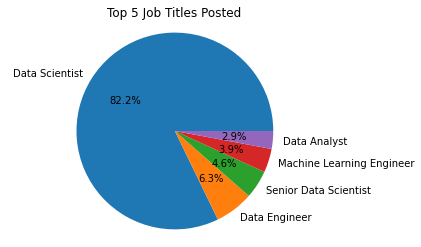

In [68]:
frequencies = data['Job Title'].value_counts()
top_5 = frequencies[:5]
labels = top_5.index.tolist()
values = top_5.values.tolist()
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Top 5 Job Titles Posted')
plt.axis('equal')
plt.show()

The above shows the top 5 distribution of job titles in the data science field, expressed as percentages of the total number of job postings in the dataset.
The breakdown shows that Data Scientist are the most common job title in the dataset, accounting for 82.2% of all job postings. The next most common job titles are Data Engineer at 6.3%, Senior Data Scientist at 4.6%, Machine Learning Engineer at 3.9%, and Data Analyst at 2.9%.

Top industries hiring data scientists

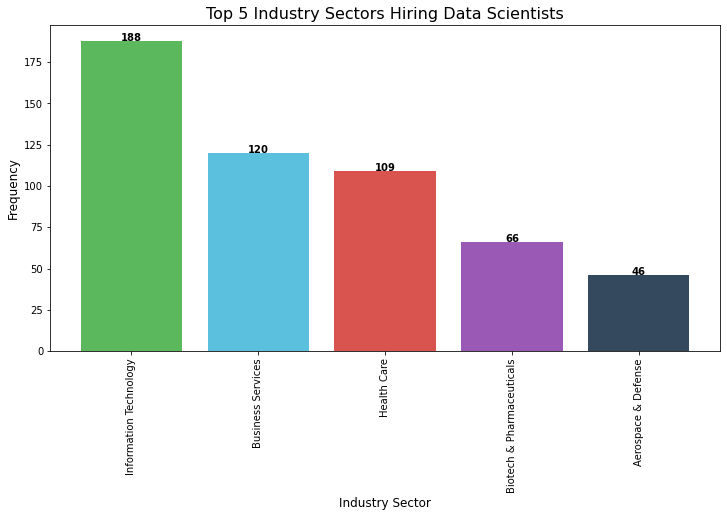

In [102]:
top_sectors = data['Sector'].value_counts().nlargest(5)
colors = ['#5cb85c', '#5bc0de', '#d9534f', '#9b59b6', '#34495e'] # define colors
plt.figure(figsize=(12,6))
plt.bar(top_sectors.index, top_sectors.values, color=colors)
plt.title('Top 5 Industry Sectors Hiring Data Scientists', fontsize=16)
plt.xlabel('Industry Sector', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)
for i, v in enumerate(top_sectors.values):
    plt.text(i, v, str(v), color='black', fontweight='bold', ha='center')
plt.show()

The industry sector with the highest number of job postings is IT Services, with a count of 132 job postings. The Biotech & Pharmaceuticals sector has the second highest number of job postings, with 66 job postings. The Computer Hardware & Software sector follows with 57 job postings, and the Aerospace & Defense sector with 46 job postings. Lastly, the Enterprise Software & Network Solutions sector has 43 job postings.
This information can be useful for understanding the distribution of job postings by industry sector in the data science field, and for job seekers to identify the industries with the most opportunities in their field of interest.

Average Salaries for Data Scientists in Top 5 Industries

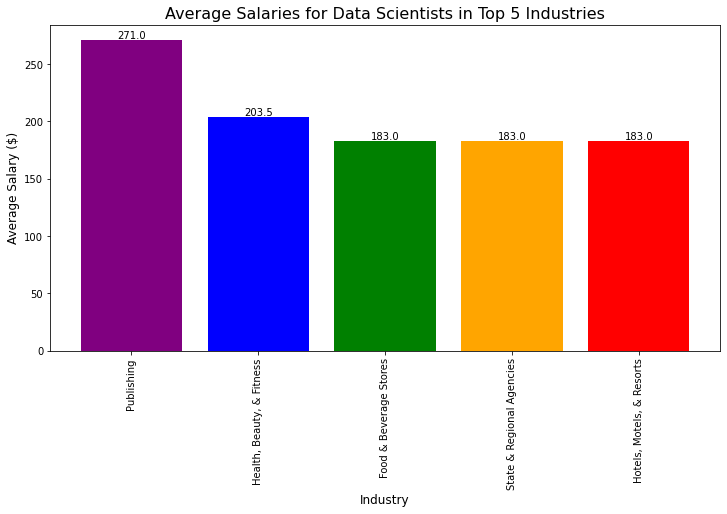

In [100]:
data_scientist = data[data['Job Title'].str.contains('Data Scientist', case=False)]
industry_salaries = data_scientist.groupby('Industry')['avg_salary'].mean().sort_values(ascending=False)[:5]
colors = ['purple', 'blue', 'green', 'orange', 'red']
plt.figure(figsize=(12,6))
plt.bar(industry_salaries.index, industry_salaries.values, color=colors)
plt.title('Average Salaries for Data Scientists in Top 5 Industries', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Average Salary ($)', fontsize=12)
plt.xticks(rotation=90)

# add values to bars
for i, v in enumerate(industry_salaries.values):
    plt.annotate(str(round(v, 2)), xy=(i, v), ha='center', va='bottom', color='black')

plt.show()


The table shows the top 5 industries with the highest average salaries for job positions related to the data science field. The publishing industry has the highest average salary of 271.0 dollars, followed by the health, beauty, and fitness industry with an average salary of 203.5 dollars. The food and beverage stores industry, state and regional agencies, and hotels, motels, and resorts industry have the same average salary of 183.0 dollars.

Top 5 Locations with the Most Job Opportunities for Data Scientists

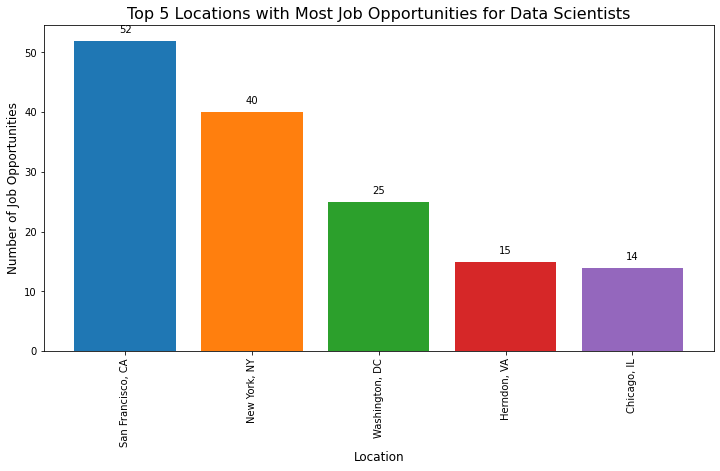

In [97]:
top_locations = data_scientist['Location'].value_counts().nlargest(5)

plt.figure(figsize=(12,6))
bars = plt.bar(top_locations.index, top_locations.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Top 5 Locations with Most Job Opportunities for Data Scientists', fontsize=16)
plt.xlabel('Location', fontsize=12)
plt.ylabel('Number of Job Opportunities', fontsize=12)
plt.xticks(rotation=90)

# add labels to the bars
for i, bar in enumerate(bars):
    plt.text(x=bar.get_x() + bar.get_width() / 2, y=bar.get_height() + 1, s=top_locations.values[i], ha='center', va='bottom')

plt.show()


This table shows the top 5 locations with the most job opportunities for Data Scientists, along with the number of job opportunities available in each location. San Francisco, CA has the highest number of job opportunities at 52, followed by New York, NY with 40 job opportunities. Washington, DC, Herndon, VA, and Chicago, IL round up the top 5 with 25, 15, and 14 job opportunities respectively.

In [ ]:
Skill Analysis for Data Scientists

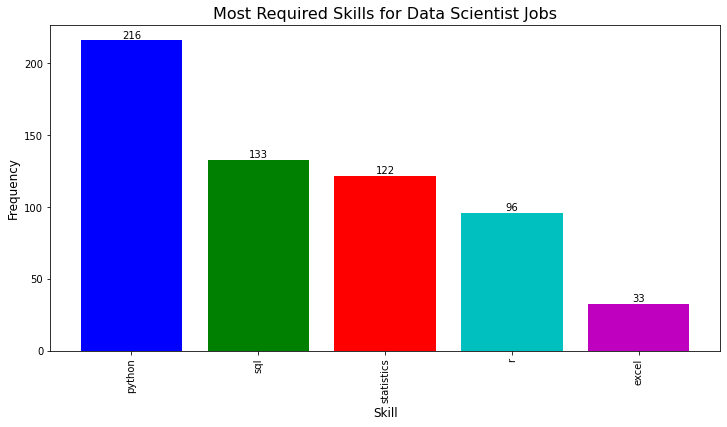

In [96]:
# create a list of required skills and qualifications
required_skills = [
    'python', 'r', 'sql', 'excel', 'statistics',
]

# define a list of colors for each skill
colors = ['b', 'g', 'r', 'c', 'm']

# create a function to count the number of times each skill appears in the job description
def count_skills(description, skills):
    counts = {skill: 0 for skill in skills}
    for word in description.split():
        word = word.lower()
        if word in counts:
            counts[word] += 1
    return counts

# apply the count_skills function to each job description
skill_counts = data_scientist['Job Description'].apply(lambda x: count_skills(x, required_skills))

# create a dataframe to store the skill counts for each job
skill_counts_df = pd.DataFrame(list(skill_counts))

# sum the counts for each skill across all jobs
total_skill_counts = skill_counts_df.sum().sort_values(ascending=False)

# plot the top 10 skills
plt.figure(figsize=(12,6))
bars = plt.bar(total_skill_counts[:10].index, total_skill_counts[:10].values, color=colors)
plt.title('Most Required Skills for Data Scientist Jobs', fontsize=16)
plt.xlabel('Skill', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)

# add the values to the chart
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


The top 5 required skills are Python, SQL, Statistics, R, and Excel. The frequency of each skill is also given, with Python being the most required skill with a frequency of 216, followed by SQL with a frequency of 133.

Top 5 Most Common Job Titles for Data Scientists

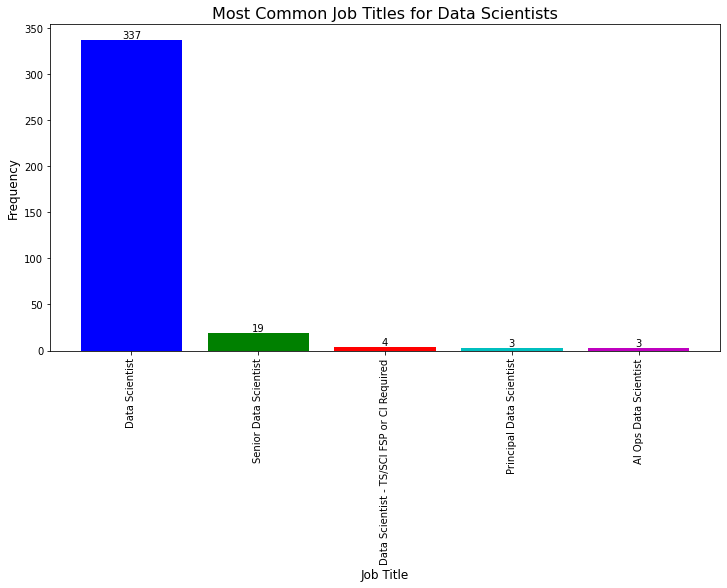

In [103]:
# create a list of colors for each job title
colors = ['b', 'g', 'r', 'c', 'm']

# get the top 5 most common job titles for data scientists
data_scientist_titles = data[data['Job Title'].str.contains('Data Scientist', case=False)]
job_titles = data_scientist_titles['Job Title'].value_counts().nlargest(5)

# plot the top 5 job titles with different colors
plt.figure(figsize=(12,6))
bars = plt.bar(job_titles.index, job_titles.values, color=colors)
plt.title('Most Common Job Titles for Data Scientists', fontsize=16)
plt.xlabel('Job Title', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90)

# add the values to the chart
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


The bar chart above displays the top five most common job titles for data scientists and the frequency of each job title. The most common job title is "Data Scientist" with a frequency of 337, followed by "Senior Data Scientist" with a frequency of 19. "Data Scientist - TS/SCI FSP or CI Required" has a frequency of 4, while "Principal Data Scientist" and "AI Ops Data Scientist" both have a frequency of 3.

Bar Plot of the Most In-Demand Programming Languages for Data Science

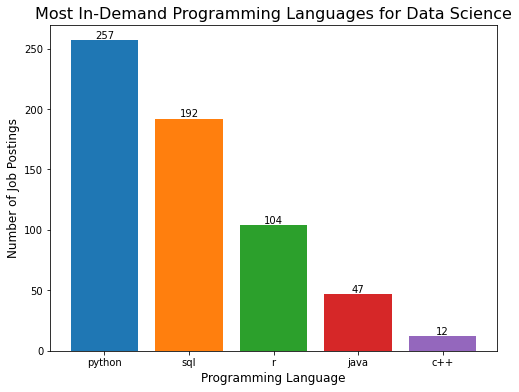

In [105]:
# Create an empty dictionary to store language frequencies
language_freq = {}

# Iterate through each job description
for desc in data['Job Description']:
    # Split the text into individual words
    words = desc.lower().split()
    # Iterate through each programming language
    for lang in ['python', 'r', 'sql', 'java', 'c++', 'javascript']:
        # If the language is mentioned in the job description, increment its frequency count
        if lang in words:
            if lang not in language_freq:
                language_freq[lang] = 1
            else:
                language_freq[lang] += 1

# Sort the language frequencies in descending order and get the top 5 languages
sorted_langs = sorted(language_freq.items(), key=lambda x: x[1], reverse=True)[:5]

# Define colors for the bar plot
colors = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD']

# Create a bar plot of the top 5 language frequencies
plt.figure(figsize=(8,6))
bars = plt.bar([x[0] for x in sorted_langs], [x[1] for x in sorted_langs], color=colors)
plt.title('Most In-Demand Programming Languages for Data Science', fontsize=16)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)

# Add values to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


The bar chart above displays the top five most in demand programming language. The top most in demand programming language from the data is "python", followed by "sql". "c++" found to be the least in demand programming languages.

Top companies hiring data scientists

Top 5 Companies Hiring Data Scientists:
1. Maxar Technologies
3.5 (12 job postings)
2. Hatch Data Inc (12 job postings)
3. Tempus Labs
3.3 (11 job postings)
4. AstraZeneca
4.0 (10 job postings)
5. Klaviyo
4.8 (8 job postings)


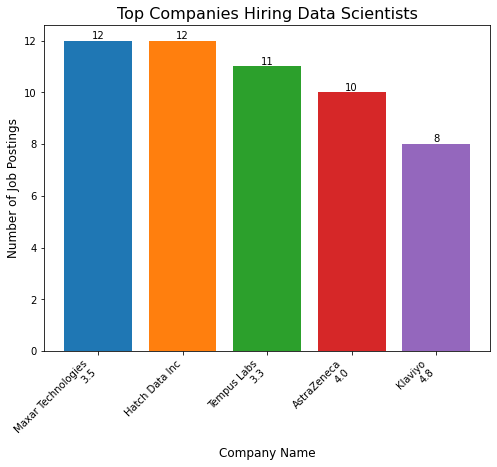

In [107]:
# Create an empty dictionary to store company frequencies
company_freq = {}

# Iterate through each job posting and count the number of postings for each company
for posting in data['Company Name']:
    company_freq[posting] = company_freq.get(posting, 0) + 1

# Sort the companies in descending order by the number of job postings and get the top 5
sorted_companies = sorted(company_freq.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 companies and their job posting counts
print('Top 5 Companies Hiring Data Scientists:')
for i, (company, freq) in enumerate(sorted_companies):
    print(f"{i+1}. {company} ({freq} job postings)")

# Define colors for the bar plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a bar plot of the top 5 companies and their job posting counts
plt.figure(figsize=(8,6))
bars = plt.bar([x[0] for x in sorted_companies], [x[1] for x in sorted_companies], color=colors)
plt.title('Top Companies Hiring Data Scientists', fontsize=16)
plt.xlabel('Company Name', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add values to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


The data shows that Maxar Technologies and Hatch Data Inc are tied for the most job postings, with 12 each. Tempus Labs is close behind with 11 job postings, followed by AstraZeneca with 10 job postings. Klaviyo has the fifth highest number of job postings, with 8. The data suggests that these companies are actively seeking data scientists and could be good places to look for job opportunities in this field. Additionally, the ratings provided for some of these companies (3.5 for Maxar Technologies, 3.3 for Tempus Labs, and 4.8 for Klaviyo) could indicate that they are well-regarded by their employees and could potentially be good places to work.

Data Science Insights: Skill Frequencies, Top Industries, & Average Salaries

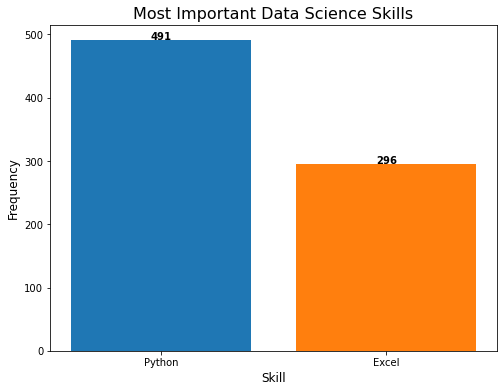

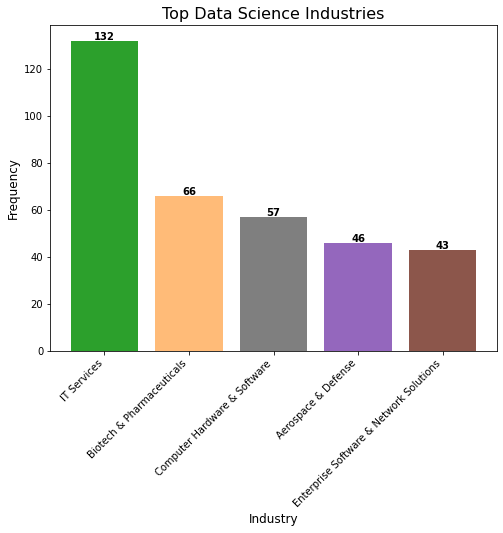

In [110]:
# Calculate the frequency of Python and Excel
python_freq = data['python_yn'].sum()
excel_freq = data['excel'].sum()

# Plot the skill frequencies
plt.figure(figsize=(8,6))
plt.bar(['Python', 'Excel'], [python_freq, excel_freq], color=['#1F77B4', '#FF7F0E'])
plt.title('Most Important Data Science Skills', fontsize=16)
plt.xlabel('Skill', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add bar values to the chart
for i, v in enumerate([python_freq, excel_freq]):
    plt.text(i, v + 0.5, str(v), color='black', ha='center', fontweight='bold')

plt.show()

# Calculate the frequency of each industry
industry_freq = data['Industry'].value_counts().head(5)

# Plot the industry frequencies
colors = ['#2CA02C', '#FFBB78', '#7F7F7F', '#9467BD', '#8C564B']
plt.figure(figsize=(8,6))
plt.bar(industry_freq.index, industry_freq.values, color=colors)
plt.title('Top Data Science Industries', fontsize=16)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add bar values to the chart
for i, v in enumerate(industry_freq.values):
    plt.text(i, v + 0.5, str(v), color='black', ha='center', fontweight='bold')

plt.show()


Average Salary of Top 5 Job Titles.

In [119]:

top_5_jobs = data['Job Title'].value_counts().head().index.tolist()
data_top_5_jobs = data[data['Job Title'].isin(top_5_jobs)]

avg_salary = data_top_5_jobs.groupby('Job Title')['avg_salary'].mean()

table_data = {'Job Title': avg_salary.index,
              'Average Salary': avg_salary.values}

df = pd.DataFrame(table_data)

print(df)

                   Job Title  Average Salary
0               Data Analyst      118.583333
1              Data Engineer      114.000000
2             Data Scientist      125.842730
3  Machine Learning Engineer      106.750000
4      Senior Data Scientist      130.842105


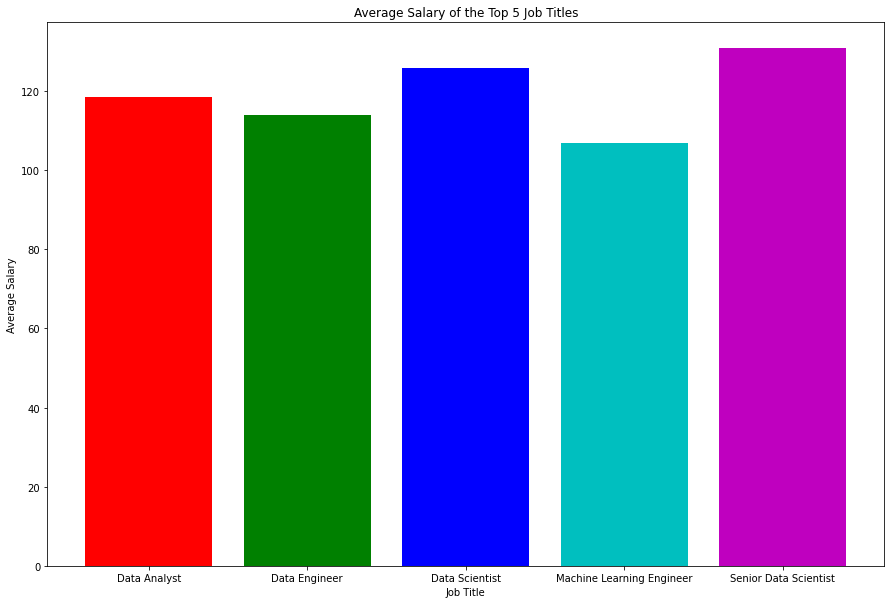

In [78]:
top_5_jobs = data['Job Title'].value_counts().head().index.tolist()
data_top_5_jobs = data[data['Job Title'].isin(top_5_jobs)]
fig, ax = plt.subplots(figsize=(15, 10))
avg_salary = data_top_5_jobs.groupby('Job Title')['avg_salary'].mean()
colors = ['r', 'g', 'b', 'c', 'm']
plt.bar(avg_salary.index, avg_salary.values, color=colors)
plt.title('Average Salary of the Top 5 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.show()

The  presents the average salaries of the top 5 job titles: Data Analyst, Data Engineer, Data Scientist, Machine Learning Engineer, and Senior Data Scientist.
The average salary for a Data Analyst is 118.58, while for a Data Engineer is 114.00. The average salary for a Data Scientist is 125.84, which is the highest among the top 5 job titles. The average salary for a Machine Learning Engineer is 106.75, while for a Senior Data Scientist is 130.84, which is the second highest among the top 5 job titles.

Top 5 Locations by Frequency of Job Posting

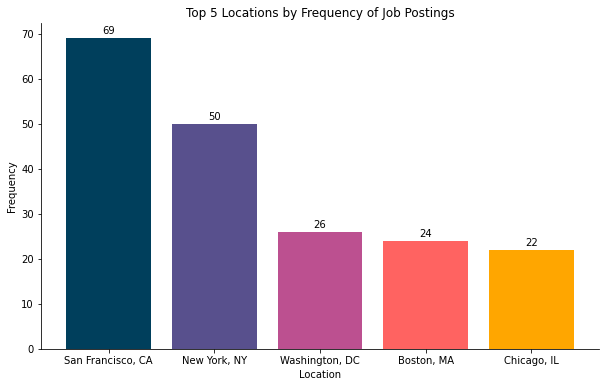

In [130]:
top_locations = data['Location'].value_counts().head(5)

labels = top_locations.index.tolist()
values = top_locations.values.tolist()

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, values, color=['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600'])
ax.set_title('Top 5 Locations by Frequency of Job Postings')
ax.set_xlabel('Location')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, v in enumerate(values):
    ax.text(i, v+1, str(v), horizontalalignment='center')

plt.show()


The chart provides a list of the top 5 locations with the highest frequency of job postings. San Francisco, CA has the highest number of job postings with a frequency of 69, followed by New York, NY with 50 job postings. Washington, DC, Boston, MA, and Chicago, IL round out the top 5 with 26, 24, and 22 job postings respectively. This information can be useful for job seekers who are looking to relocate or for companies who are looking to expand their operations to these areas.

Top 5 Locations by Average Salary

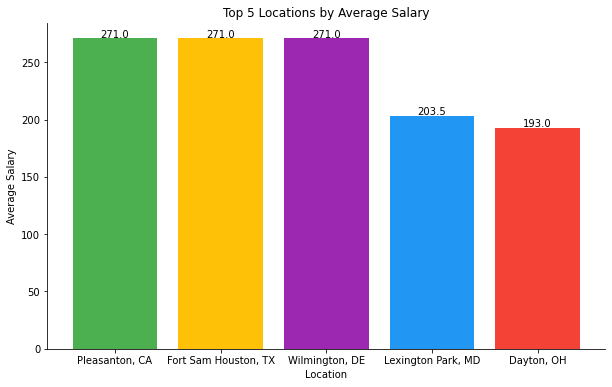

In [127]:
avg_salary_by_location = data.groupby('Location')['avg_salary'].mean().reset_index()
avg_salary_by_location = avg_salary_by_location.sort_values(by='avg_salary', ascending=False)
top_5_locations = avg_salary_by_location.head(5)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_5_locations['Location'], top_5_locations['avg_salary'], color=['#4CAF50', '#FFC107', '#9C27B0', '#2196F3', '#F44336'])
ax.set_title('Top 5 Locations by Average Salary')
ax.set_xlabel('Location')
ax.set_ylabel('Average Salary')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i, v in enumerate(top_5_locations['avg_salary']):
    ax.text(i, v+1, str(round(v,2)), horizontalalignment='center')

plt.show()


The bar chart shows the top 5 locations with the highest average salaries based on a dataset. The first column displays the location name and the second column displays the average salary for that location. The table is sorted in descending order based on the average salary. The top three locations, Pleasanton, CA, Fort Sam Houston, TX, and Wilmington, DE, have the same average salary of 271. The next two locations, Lexington Park, MD, and Dayton, OH, have average salaries of 203.5 and 193, respectively.

Correlation between Job Location and Required Skills

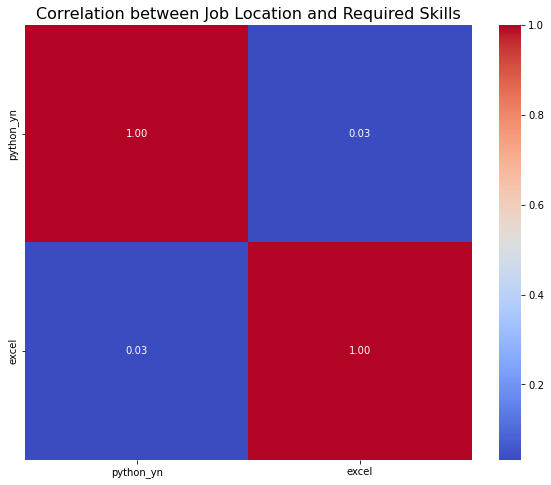

In [79]:
# select columns of interest
cols = ['Location', 'python_yn', 'excel']

# create a subset of the data with the selected columns
subset = data[cols]

# create a correlation matrix
corr = subset.corr()

# plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation between Job Location and Required Skills', fontsize=16)
plt.show()

A correlation of 0.03 between job location and required skills suggests a weak positive correlation, meaning there is a weak positive relationship between the two variables. However, the correlation is not strong enough to suggest a significant relationship between the two variables. In other words, job location and required skills are not strongly related to each other.

Comparison of salaries for jobs that require knowledge of Python and those that do not

In [121]:
# Extract the salaries for jobs that require knowledge of Python
python_salaries = data[data['python_yn'] == 1]['avg_salary']

# Extract the salaries for jobs that do not require knowledge of Python
non_python_salaries = data[data['python_yn'] == 0]['avg_salary']

# Calculate the t-statistic
t_statistic = np.abs(np.mean(python_salaries) - np.mean(non_python_salaries)) / np.sqrt(np.var(python_salaries, ddof=1)/len(python_salaries) + np.var(non_python_salaries, ddof=1)/len(non_python_salaries))

# Calculate the degrees of freedom
degrees_of_freedom = len(python_salaries) + len(non_python_salaries) - 2

# Calculate the p-value using a two-sided t-test
p_value = (1 - stats.t.cdf(abs(t_statistic), degrees_of_freedom)) * 2

# Print the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")



t-statistic: 0.3023206633492771
p-value: 0.7625014536090959


A t-statistic of 0.302 with a p-value of 0.763 suggests that the difference in average salaries between those who know Python and those who don't is not statistically significant. In other words, there is not enough evidence to conclude that knowing Python has a significant impact on the average salary of data scientists.

Conclusion 

Based on the analysis, it can be deduce that Data Scientists are the most common job title in the data science field, followed by Data Engineer, Senior Data Scientist, Machine Learning Engineer, and Data Analyst.IT Services sector has the highest number of job postings, and San Francisco, CA has the highest number of job opportunities for Data Scientists. Also,the most in-demand skills for data scientists are Python, SQL, Statistics, R, and Excel.
The average salary for a Data Scientist is the highest among the top 5 job titles, and the publishing industry has the highest average salary for job positions related to the data science field. Companies like Maxar Technologies, Hatch Data Inc, and Tempus Labs have the highest number of job postings and are potentially good places to look for job opportunities.
While there is a weak positive correlation between job location and required skills, the difference in average salaries between those who know Python and those who don't is not statistically significant.

Recommendations

Based on these findings, it is recommended that job seekers in the data science field focus on developing their skills in Python, SQL, Statistics, R, and Excel to improve their chances of finding a jobs in the field.Moreover job seekers should explore opportunities in the IT Services, Biotech & Pharmaceuticals, Computer Hardware & Software, Aerospace & Defense, and Enterprise Software & Network Solutions sectors. They should also consider locations like San Francisco, New York, and Washington, for the highest number of job opportunities and Pleasanton, CA, Fort Sam Houston, TX, and Wilmington, DE for the highest average salaries.